In [4]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

In [5]:
Xtemp=X

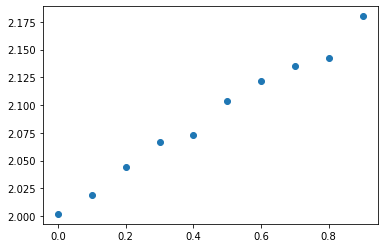

In [6]:
plt.scatter(X,y);

In [4]:
for i in range (2,9):
        xadd=Xtemp**i
        X=np.column_stack((X,xadd))

In [5]:
X.shape

(10, 8)

In [6]:
X=np.column_stack((np.ones(len(X)),X))

In [7]:
theta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

In [8]:
print(theta)

[[ 2.00199584e+00]
 [ 2.59381998e-01]
 [-3.83255070e+00]
 [ 4.94210658e+01]
 [-2.62208595e+02]
 [ 6.98308136e+02]
 [-9.86595741e+02]
 [ 7.06146870e+02]
 [-2.01451766e+02]]


In [9]:
def f(x,theta):
    y=theta[0]+theta[1]*x**1+theta[2]*x**2+theta[3]*x**3+theta[4]*x**4+theta[5]*x**5+theta[6]*x**6+theta[7]*x**7+theta[8]*x**8
    return y

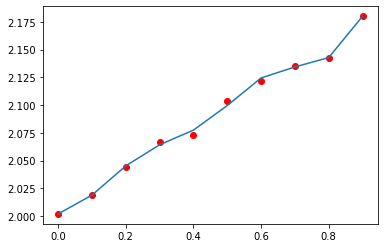

In [10]:
plt.scatter(Xtemp,y.T,color="r")
plt.plot(Xtemp,f(Xtemp,theta))
plt.show()

In [11]:
from sklearn import linear_model
lamda=0.0001
lamb_I=lamda*np.eye(np.dot(X.T,X).shape[0])
theta2=np.dot(np.linalg.inv(np.dot(X.T,X)+lamb_I),np.dot(X.T,y))
print(theta2)

[[ 2.00186092]
 [ 0.18640793]
 [ 0.04544331]
 [ 0.05368191]
 [-0.08135552]
 [-0.16849894]
 [-0.11769412]
 [ 0.05225997]
 [ 0.28694751]]


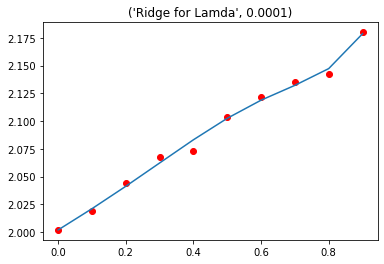

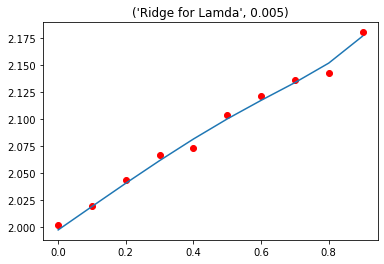

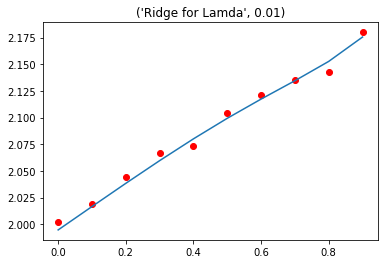

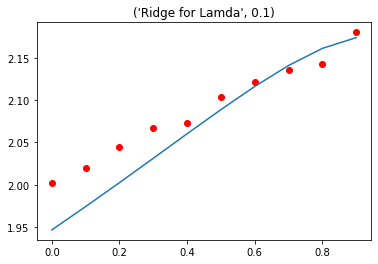

In [12]:
testlistforlamda=[0.0001,0.005,0.01,0.1]
for l in testlistforlamda:
    lamb_I=l*np.eye(np.dot(X.T,X).shape[0])
    theta2=np.dot(np.linalg.inv(np.dot(X.T,X)+lamb_I),np.dot(X.T,y))
    plt.title(('Ridge for Lamda',l))
    plt.scatter(Xtemp,y*np.ones((10,1)),color="r")
    plt.plot(Xtemp,f(Xtemp,theta2))
    plt.show()

In [13]:
lamda=0.0001
clf=linear_model.Lasso(lamda)
clf.fit(X[:,1:],y)
theta3=[]
theta3=np.append(clf.intercept_,clf.coef_)
print(theta3)

[2.00441216 0.18774234 0.         0.         0.         0.
 0.         0.         0.        ]


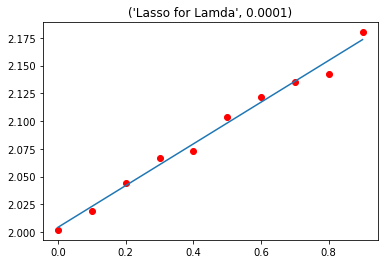

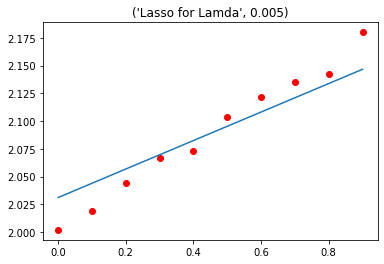

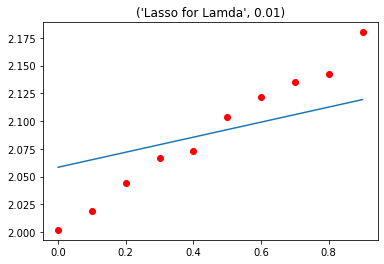

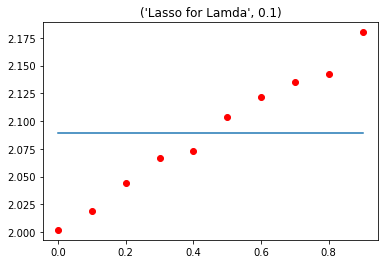

In [14]:
for l in testlistforlamda:
    clf=linear_model.Lasso(l)
    clf.fit(X[:,1:],y)
    theta3=[]
    theta3=np.append(clf.intercept_,clf.coef_)
    plt.title(('Lasso for Lamda',l))
    plt.scatter(Xtemp,y.T,color="r")
    plt.plot(Xtemp,f(Xtemp,theta3))
    plt.show()

We see that for lower values of Lamda(0.001<) both Ridge's and Lasso's method depict the true model better than for higher in value Lamdas.For higher lamdas we see that both models don't come even close to estimating the model correctly.We also see that for Lamda=0 Ridge's Regression is equal to the LS(As expected).